## Correlation

Correlation Feature Selection evaluates subsets of features on the basis of the following hypothesis: "Good feature subsets contain features highly correlated with the target, yet uncorrelated to each other".

**References**:

M. Hall 1999, [Correlation-based Feature Selection for Machine Learning](http://www.cs.waikato.ac.nz/~mhall/thesis.pdf)

Senliol, Baris, et al. "Fast Correlation Based Filter (FCBF) with a different search strategy." Computer and Information Sciences.



I will demonstrate how to select features based on correlation using 2 procedures. The first one is a brute force function that finds correlated features without any further insight. The second procedure finds groups of correlated features. Often, more than 2 features are correlated with each other. We can find groups of 3, 4 or more features that are correlated. By identifying these groups, we can then select from each group, which feature we want to keep, and which ones we want to remove.

I will use the Paribas claims dataset from Kaggle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [4]:
# load dataset

file_path = '/Users/wontaek/Documents/Lecture_dataset/BNP_Paribas_Cardif_claims/train.csv'
data = pd.read_csv(file_path, nrows=50000)
data.shape

(50000, 133)

In [5]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [6]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess whether they are correlated with other features

# here for simplicity I will use only numerical variables
# select numerical columns:


numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(50000, 114)

[pandas select_dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 114 entries, ID to v131
dtypes: float64(108), int64(6)
memory usage: 43.5 MB


In [8]:
data.head()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,NaN,9.191265,NaN,NaN,2.301630,NaN,...,NaN,NaN,NaN,0.598896,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


### Important

In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.

In [9]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target', 'ID'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0
)

X_train.shape, X_test.shape

((35000, 112), (15000, 112))

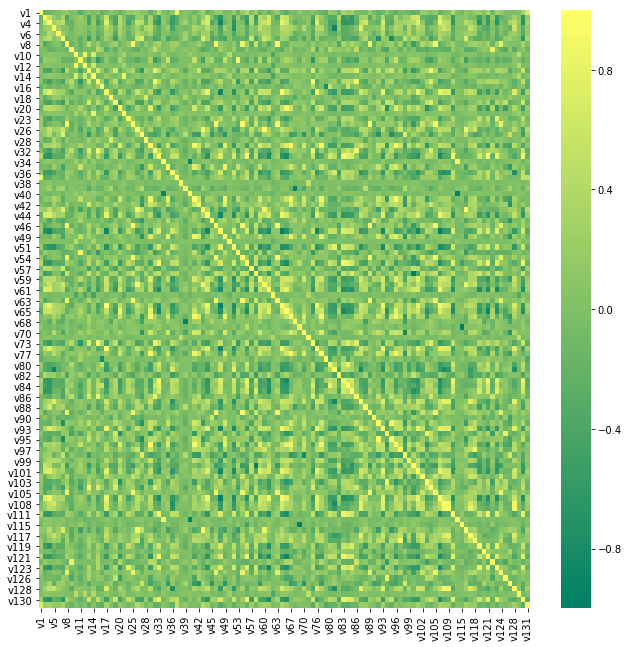

In [10]:
# visualise correlated features
# I will build the correlation matrix, which examines the 
# correlation of all features (for all possible feature combinations)
# and then visualise the correlation matrix using seaborn

corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11, 11)
sns.heatmap(corrmat, cmap='summer')

In [11]:
corrmat.head()

,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
v1,1.000000,-0.214441,-0.138651,-0.060750,-0.015902,0.105593,0.158376,-0.024072,-0.012149,-0.270903,...,0.354872,-0.139074,0.300772,0.150405,0.028196,-0.005724,-0.028201,-0.020508,0.262435,0.699832
v2,-0.214441,1.000000,0.535565,0.201908,0.015211,0.348694,-0.367301,-0.013361,0.057521,0.229426,...,-0.570172,0.169511,-0.593245,-0.256479,-0.099032,0.008931,0.260275,0.081289,-0.579851,0.175647
v4,-0.138651,0.535565,1.000000,0.260137,0.377441,0.477087,-0.169936,-0.209665,0.091749,0.119699,...,-0.610183,0.040277,-0.710741,-0.050260,-0.120078,0.298108,0.490682,0.114618,-0.703246,0.313911
v5,-0.060750,0.201908,0.260137,1.000000,0.244101,0.051695,-0.004658,-0.170264,0.050314,0.117920,...,-0.353672,0.016612,-0.232443,0.072054,-0.094224,-0.230728,0.590853,0.047445,-0.253705,0.153792
v6,-0.015902,0.015211,0.377441,0.244101,1.000000,0.200610,0.028994,-0.048997,0.054143,0.058636,...,-0.277890,0.084340,-0.304233,0.034918,-0.173586,0.162040,0.235247,0.055887,-0.298493,0.158442


In the plot above, the red squares correspond to highly correlated features (>0.8). We can see that there are quite a few. The diagonal represents the correlation of a feature with itself, therefore the value is 1.

### Brute force approach

In [12]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything else
# without any other insight.

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    
    return col_corr

In [13]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

55

We can see that 55 features are highly correlated with other features in the training set. Very likely, by removing these correlated features, the performance of your machine learning models will drop very little, if at all. We can go ahead and drop the features like we have done in previous lectures.

In [14]:
corr_features

{'v100',
 'v101',
 'v103',
 'v104',
 'v105',
 'v106',
 'v108',
 'v109',
 'v111',
 'v114',
 'v115',
 'v116',
 'v118',
 'v12',
 'v121',
 'v122',
 'v123',
 'v124',
 'v126',
 'v128',
 'v130',
 'v21',
 'v25',
 'v32',
 'v37',
 'v40',
 'v41',
 'v43',
 'v44',
 'v46',
 'v48',
 'v49',
 'v53',
 'v54',
 'v55',
 'v60',
 'v63',
 'v64',
 'v65',
 'v67',
 'v68',
 'v73',
 'v76',
 'v77',
 'v78',
 'v81',
 'v83',
 'v84',
 'v86',
 'v87',
 'v89',
 'v93',
 'v95',
 'v96',
 'v98'}

In [15]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 57), (15000, 57))

#### 여담

Correlation
- 종종 우리는 높은 상관관계를 갖는 변수들을 마주하게 되고, 이 변수들은 필요 이상의 정보를 제공한다. 
- 상관관계가 높은 변수를 제거함으로써 해당 변수에 포함된 정보들에 의한 예측값이 편향되는 것을 방지할 수 있다. 
- 이런 점들은 우리가 특정 변수들의 생물학적/의학적 중요성에 대한 주장을 할 때, 중요 변수들은 결과물을 예측할 때 적절한 것이지, 인과관계를 설명하는 것이 아님을 인지해야 한다.

By removing correlated columns we reduced the feature space from 112 numerical columns to 57, almost half of the original set.

### Second approach

The second approach looks to identify groups of highly correlated features. And then, we can make further investigation within these groups to decide which feature we keep and which one we remove.

In [16]:
# load dataset

data = pd.read_csv(file_path, nrows=50000)

# select numerical variables
data = data[numerical_vars]

# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target', 'ID'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

In [17]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = X_train.corr()

In [18]:
corrmat.head()

,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
v1,1.000000,-0.214441,-0.138651,-0.060750,-0.015902,0.105593,0.158376,-0.024072,-0.012149,-0.270903,...,0.354872,-0.139074,0.300772,0.150405,0.028196,-0.005724,-0.028201,-0.020508,0.262435,0.699832
v2,-0.214441,1.000000,0.535565,0.201908,0.015211,0.348694,-0.367301,-0.013361,0.057521,0.229426,...,-0.570172,0.169511,-0.593245,-0.256479,-0.099032,0.008931,0.260275,0.081289,-0.579851,0.175647
v4,-0.138651,0.535565,1.000000,0.260137,0.377441,0.477087,-0.169936,-0.209665,0.091749,0.119699,...,-0.610183,0.040277,-0.710741,-0.050260,-0.120078,0.298108,0.490682,0.114618,-0.703246,0.313911
v5,-0.060750,0.201908,0.260137,1.000000,0.244101,0.051695,-0.004658,-0.170264,0.050314,0.117920,...,-0.353672,0.016612,-0.232443,0.072054,-0.094224,-0.230728,0.590853,0.047445,-0.253705,0.153792
v6,-0.015902,0.015211,0.377441,0.244101,1.000000,0.200610,0.028994,-0.048997,0.054143,0.058636,...,-0.277890,0.084340,-0.304233,0.034918,-0.173586,0.162040,0.235247,0.055887,-0.298493,0.158442


In [19]:
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat.head()

v1  v1    1.000000
    v2    0.214441
    v4    0.138651
    v5    0.060750
    v6    0.015902
dtype: float64

In [20]:
corrmat

v1    v1      1.000000
      v2      0.214441
      v4      0.138651
      v5      0.060750
      v6      0.015902
      v7      0.105593
      v8      0.158376
      v9      0.024072
      v10     0.012149
      v11     0.270903
      v12     0.010920
      v13     0.058799
      v14     0.019762
      v15     0.045029
      v16     0.194490
      v17     0.095682
      v18     0.101137
      v19     0.011186
      v20     0.172330
      v21     0.002845
      v23     0.187615
      v25     0.170582
      v26     0.232846
      v27     0.046229
      v28     0.047859
      v29     0.209408
      v32     0.034662
      v33     0.426625
      v34     0.003448
      v35     0.101261
                ...   
v131  v97     0.043001
      v98     0.093567
      v99     0.134206
      v100    0.093175
      v101    0.268638
      v102    0.142916
      v103    0.103172
      v104    0.182372
      v105    0.031551
      v106    0.312085
      v108    0.250767
      v109    0.226351
      v111 

In [21]:
corrmat = corrmat.sort_values(ascending=False)

In [22]:
corrmat = corrmat[corrmat >= 0.8]

In [23]:
corrmat = corrmat[corrmat < 1]

In [24]:
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,v100,v58,0.997974
1,v58,v100,0.997974
2,v115,v69,0.993229
3,v69,v115,0.993229
4,v17,v76,0.992511


In [25]:
# find groups of correlated features

grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 32 correlated groups
out of 112 total features


In [26]:
correlated_groups

[  feature1 feature2      corr
 0     v100      v58  0.997974,   feature1 feature2      corr
 2     v115      v69  0.993229,     feature1 feature2      corr
 4        v17      v76  0.992511
 9        v17      v64  0.982145
 107      v17      v48  0.910103
 130      v17      v93  0.887841
 174      v17     v106  0.854995
 218      v17      v44  0.818050
 243      v17     v101  0.800001,    feature1 feature2      corr
 6       v46      v63  0.991521
 10      v46      v25  0.982115
 24      v46       v8  0.974733
 58      v46     v105  0.944465
 72      v46      v89  0.932504
 88      v46      v54  0.918355,     feature1 feature2      corr
 16       v60      v26  0.980037
 148      v60      v43  0.872723
 176      v60     v116  0.854290,    feature1 feature2      corr
 18      v92      v95  0.978357,    feature1 feature2      corr
 28     v114      v40  0.966750
 99     v114      v34  0.911422,     feature1 feature2      corr
 30       v83     v121  0.966052
 35       v83      v33  0.9640

In [27]:
# now we can visualise each group. We see that some groups contain
# only 2 correlated features, some other groups present several features 
# that are correlated among themselves.

for group in correlated_groups:
    print(group)
    print()

  feature1 feature2      corr
0     v100      v58  0.997974

  feature1 feature2      corr
2     v115      v69  0.993229

    feature1 feature2      corr
4        v17      v76  0.992511
9        v17      v64  0.982145
107      v17      v48  0.910103
130      v17      v93  0.887841
174      v17     v106  0.854995
218      v17      v44  0.818050
243      v17     v101  0.800001

   feature1 feature2      corr
6       v46      v63  0.991521
10      v46      v25  0.982115
24      v46       v8  0.974733
58      v46     v105  0.944465
72      v46      v89  0.932504
88      v46      v54  0.918355

    feature1 feature2      corr
16       v60      v26  0.980037
148      v60      v43  0.872723
176      v60     v116  0.854290

   feature1 feature2      corr
18      v92      v95  0.978357

   feature1 feature2      corr
28     v114      v40  0.966750
99     v114      v34  0.911422

    feature1 feature2      corr
30       v83     v121  0.966052
35       v83      v33  0.964033
115      v83     v111

In [28]:
# we can now investigate further features within one group.
# let's for example select group 3

group = correlated_groups[2]
group

,feature1,feature2,corr
4,v17,v76,0.992511
9,v17,v64,0.982145
107,v17,v48,0.910103
130,v17,v93,0.887841
174,v17,v106,0.854995
218,v17,v44,0.818050
243,v17,v101,0.800001


In [29]:
# we could select the features with less missing data
# like this:

for feature in list(group.feature2.unique())+['v17']:
    print(X_train[feature].isnull().sum())

15275
15275
15275
15288
15275
15275
15275
15275


All features show similar number of missing data in this case.

Alternatively, we could build a machine learning algorithm using all the features from the above list, and select the more predictive one.

In [30]:
from sklearn.ensemble import RandomForestClassifier

features = list(group.feature2.unique())+['v17']
rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
rf.fit(X_train[features].fillna(0), y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=39, verbose=0,
                       warm_start=False)

In [31]:
# we get the feature importance attributed by the 
# random forest model (more on this in coming lectures)

importance = pd.concat(
    [pd.Series(features),
     pd.Series(rf.feature_importances_)], axis=1)



In [32]:
importance

,0,1
0,v76,0.108071
1,v64,0.118110
2,v48,0.173981
3,v93,0.154484
4,v106,0.113958
5,v44,0.084062
6,v101,0.129764
7,v17,0.117571


In [33]:
importance.columns = ['feature', 'importance']
importance.sort_values(by='importance', ascending=False)

,feature,importance
2,v48,0.173981
3,v93,0.154484
6,v101,0.129764
1,v64,0.118110
7,v17,0.117571
4,v106,0.113958
0,v76,0.108071
5,v44,0.084062


In this case, feature v48 shows the higher importance according to random forests. Then, I would select v48, and remove all the remaining features from this group from the dataset.

**Note**

None of the 2 procedures for removing correlated features are perfect, and some correlated features may escape the loops of code. So it might be worthwhile to check that after removing the correlated features, there are no correlated features left in the dataset. If there are, repeat the procedure to remove the remaining ones.

That is all for this lecture, I hope you enjoyed it and see you in the next one!